0    9900
1     100
dtype: int64


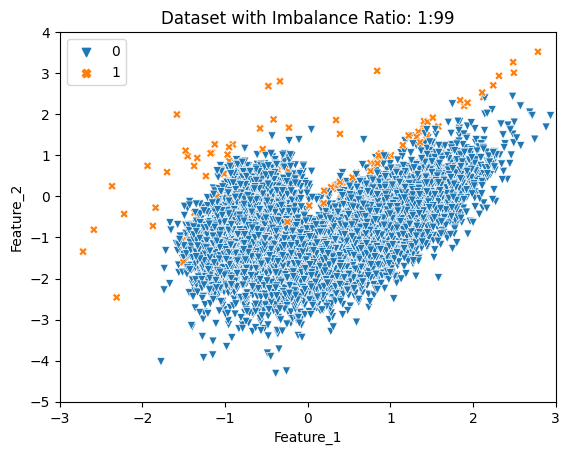

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

from sklearn.datasets import make_classification
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

def plot_dataset(X, y, label):
    X = pd.DataFrame(X, columns = ["Feature_1", "Feature_2"])
    y = pd.Series(y)

    print(y.value_counts())

    markers = {1: "X", 0: "v"}
    sns.scatterplot(
        data = X, 
        x = "Feature_1", y = "Feature_2", 
        hue = y, 
        style = y, 
        markers = markers
    )

    plt.title(label)
    plt.ylim(-5, 4)
    plt.xlim(-3, 3)

    plt.show()
    
    
    
X, y = make_classification(
    n_samples = 10000,
    n_features = 2,
    n_redundant = 0,
    n_classes = 2,
    flip_y = 0,
    n_clusters_per_class = 2,
    class_sep = 0.79,
    weights = [0.99],
    random_state = 81,
)

plot_dataset(X, y, "Dataset with Imbalance Ratio: 1:99")

###  CondensedNearestNeighbour :

`CondensedNearestNeighbour` is a machine learning technique for handling imbalanced datasets. It employs a process of iteratively removing redundant majority class instances while preserving the overall class distribution. The method uses the k-nearest neighbors algorithm to identify and eliminate instances that can be accurately represented by other instances in the dataset. By condensing the majority class without losing essential information, `CondensedNearestNeighbour` aims to create a more compact and representative training dataset. This process contributes to improving the efficiency of machine learning models, particularly in situations with imbalanced class distributions, by reducing redundancy in the majority class.

Resampled dataset shape Counter({0: 198, 1: 100})
0    198
1    100
dtype: int64


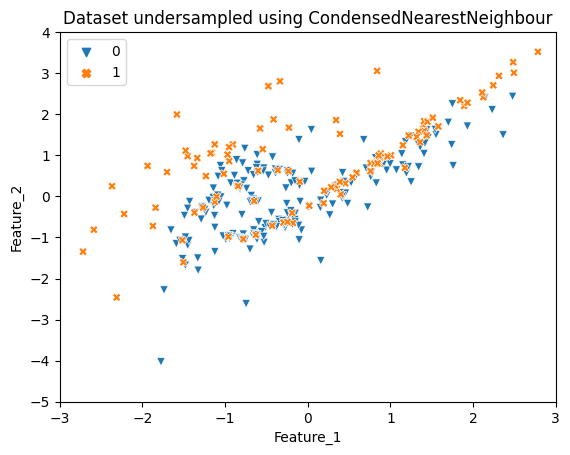

In [2]:
from imblearn.under_sampling import CondensedNearestNeighbour

cnn = CondensedNearestNeighbour(random_state=42)
X_res, y_res = cnn.fit_resample(X, y)
print("Resampled dataset shape %s" % Counter(y_res))

plot_dataset(X_res, y_res, "Dataset undersampled using CondensedNearestNeighbour")